<a href="https://colab.research.google.com/github/Joriswillems/socioPhysicsTUe/blob/master/introduction_python_data_ananlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Add examples with pedestrian data

# Introduction to Data Analysis using Numpy and Pandas

This notebook will give a short overview of how to start analysis on a dataset, using the python libraries numpy and pandas. Remember that this is just an introduciton, and will probably not cover everything you need. There is a lot of documentation to find on both of these libraries, for example in [this tutorial](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/), or in the [full documentation](https://pandas.pydata.org/docs/). If that's not enough, Google has a lot more to offer.

First, we need to import both libraries.

In [ ]:
import numpy as np
import pandas as pd

By using 'as' we can assign a abbreviation, so that we don't have to type the entire name each time we use the library, which will be often

## Importing data from a .csv file

To import data from a .csv file, it is easiest to make sure that that file is in the same folder as the notebook on your computer. You can also import directly from a URL. If you're working on Google colab, you can also establish a link to your Google Drive to use files that are in that cloud storage.

With this, we use the ```read_csv()``` function to import a csv file.

For this introduction, I've used a dataset on country data, obtained from https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv

Usually, the delimiter between values is a ',', hence the name 'csv' (Comma-Separated Values). However, in this file, the delimiter is ';', so we need to indicate that in the import.


In [ ]:
file_url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df_countries = pd.read_csv(file_url, delimiter = ';')

The ```read_csv()``` command returns a pandas DataFrame. This is the default representation of data in pandas. It is standard covnention to use a ```df_``` prefix to any variable name that represents a DataFrame. To give a first view of the information in a Dataframe, we can use the ```.head()``` method to display the first 5 rows of the DataFrame.

In [ ]:
df_countries.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


As you can see, this data contains a lot of information about many countries (19 columns of quantities). Suppose, we are only interested in the continent, area and population of a country, then we can extract just these columns by using double square brackets:

In [ ]:
df_population = df_countries[['name', 'continent', 'area', 'population']]
df_population.head()

,name,continent,area,population
0,Andorra,EU,468.0,84000
1,United Arab Emirates,AS,82880.0,4975593
2,Afghanistan,AS,647500.0,29121286
3,Antigua and Barbuda,NaN,443.0,86754
4,Anguilla,NaN,102.0,13254


This makes the dataframe easier to read.

## Basic statistics on the data

If we want to view some basic statistics of the data, the easiest start is made by using ```df.describe()```:

In [ ]:
df_population.describe()

,area,population
count,2.520000e+02,2.520000e+02
mean,5.952879e+05,2.727679e+07
std,1.904818e+06,1.164127e+08
min,0.000000e+00,0.000000e+00
25%,1.098000e+03,1.879528e+05
50%,6.489450e+04,4.268583e+06
75%,3.622245e+05,1.536688e+07
max,1.710000e+07,1.330044e+09


This provides us with:
- number of values in each numeric column (count)
- the mean of these values (mean)
- the standard deviation (std)
- the minimum (min)
- the maximum (max)
- the 25%, 50%, and 75% quantiles

If we, for example, want to know which countries have the highest population, we can sort the dataframe:

In [ ]:
df_population.sort_values(by = 'population', ascending = False)

,name,continent,area,population
47,China,AS,9596960.0,1330044000
104,India,AS,3287590.0,1173108018
233,United States,NaN,9629091.0,310232863
100,Indonesia,AS,1919440.0,242968342
30,Brazil,SA,8511965.0,201103330
...,...,...,...,...
89,South Georgia and the South Sandwich Islands,AN,3903.0,30
232,United States Minor Outlying Islands,OC,0.0,0
33,Bouvet Island,AN,49.0,0
8,Antarctica,AN,14000000.0,0


By using the 'by' statement, we choose which column to sort by. By using ```ascending = True``` we can sort in ascending order, ```ascending = False``` will result in descending order.

If we want to do calculations on the variables in a DataFrame, we can add columns in a very straight-forward fashion:

In [ ]:
df_population['density'] = df_population['population'] / df_population['area']

df_population

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,continent,area,population,density
0,Andorra,EU,468.0,84000,179.487179
1,United Arab Emirates,AS,82880.0,4975593,60.033699
2,Afghanistan,AS,647500.0,29121286,44.974959
3,Antigua and Barbuda,NaN,443.0,86754,195.832957
4,Anguilla,NaN,102.0,13254,129.941176
...,...,...,...,...,...
247,South Africa,AF,1219912.0,49000000,40.166832
248,Zambia,AF,752614.0,13460305,17.884739
249,Zimbabwe,AF,390580.0,13061000,33.440012
250,Serbia and Montenegro,EU,102350.0,10829175,105.805325


By dividing the population by the area, we get the population density of the country. Again, we can get the basic statistics:

In [ ]:
df_population['density'].describe()

count      251.000000
mean       306.013919
std       1255.710574
min          0.000000
25%         28.762246
50%         78.086579
75%        195.874333
max      16905.128205
Name: density, dtype: float64

## Filtering and Grouping

Now, we might not always be interested in the entire dataframe. To filter rows in the dataframe, a 'Boolean mask' can be created, by using a Boolean statement on one of the columns. For example, to check which countries are in Asia:

In [ ]:
countries_in_asia = df_population['continent'] == 'AS'

countries_in_asia

0      False
1       True
2       True
3      False
4      False
       ...  
247    False
248    False
249    False
250    False
251    False
Name: continent, Length: 252, dtype: bool

As you can see, for each of the rows, this indicates whether the statement is true or false. Now, to actually view the countries in Asia, we use the Boolean mask as an index:

In [ ]:
df_asia = df_population[countries_in_asia]

df_asia

,name,continent,area,population,density
1,United Arab Emirates,AS,82880.0,4975593,60.033699
2,Afghanistan,AS,647500.0,29121286,44.974959
6,Armenia,AS,29800.0,2968000,99.597315
15,Azerbaijan,AS,86600.0,8303512,95.883510
18,Bangladesh,AS,144000.0,156118464,1084.156000
22,Bahrain,AS,665.0,738004,1109.780451
27,Brunei,AS,5770.0,395027,68.462218
32,Bhutan,AS,47000.0,699847,14.890362
38,Cocos Islands,AS,14.0,628,44.857143
47,China,AS,9596960.0,1330044000,138.590137


In this way, we can obtain summary statistics for a certain group of the rows. But suppose we are not only interested in Asia, but in all continents. To do this, we can use ```df.groupby()```:

In [ ]:
df_population_grouped = df_population.groupby('continent')

df_population_grouped['population'].describe() #grouping with apply, grouping with transform, querying

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,58.0,1.753241e+07,2.663389e+07,7460.0,1674830.0,9987785.0,20617635.75,1.540000e+08
AN,5.0,3.400000e+01,6.066300e+01,0.0,0.0,0.0,30.00,1.400000e+02
AS,52.0,7.943435e+07,2.424824e+08,628.0,3621729.5,11378596.0,34359364.75,1.330044e+09
EU,54.0,1.388834e+07,2.591090e+07,921.0,426634.5,4606458.5,10457750.00,1.407020e+08
OC,27.0,1.335780e+06,4.262102e+06,0.0,13248.5,92533.0,246018.50,2.151575e+07
SA,14.0,2.858168e+07,5.209916e+07,2638.0,1430614.5,12369013.0,29236059.25,2.011033e+08


## Plotting

Pandas has integrated libraries to plot the data in a dataframe. By default, the index is used for the horizontal axis, so the way in which the data is sorted makes a big difference.

By calling ```df.plot()```, we can make all kinds of plots. The default is a line plot:



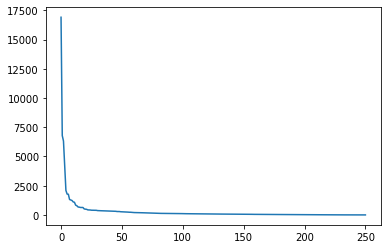

In [ ]:
df_population.sort_values(by = 'density', ascending = False).reset_index()['density'].plot()

From this plot, we see that there are a few countries with a very high density, and then a lot of countries that have a much more similar density to each other.

To investigate correlations in the data, a scatter plot can be very useful. For example, if we want to plot the number of people in a country, and see how this correlates with the area of that country we can use ```kind = scatter```:

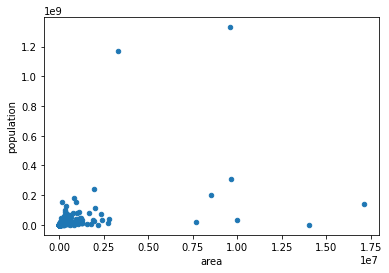

In [ ]:
df_population.plot(kind = 'scatter', x = 'area', y = 'population')

Other plots include the box plot, which indicates the mean and other descriptive statistics. See [wikipedia](https://en.wikipedia.org/wiki/Box_plot) for some more extensive explanation on how to read these graphs.

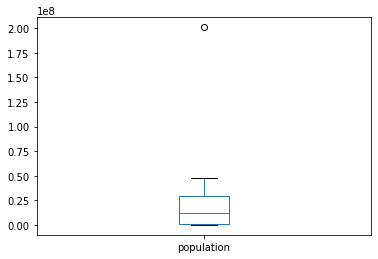

In [ ]:
df_population[df_population['continent'] == 'SA']['population'].plot(kind = 'box')

A histogram is another viable option, which counts how many times a value is in a certain range. The size of these ranges can be adjusted changing the number of bins.

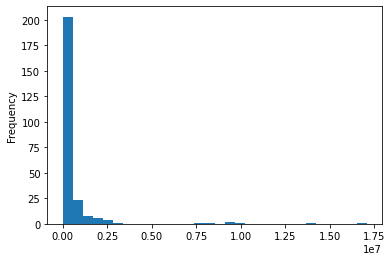

In [ ]:
df_population['area'].plot(kind = 'hist', bins = 30)

Because the scaling in this figure is severely adjusted by a few countries with a very high area, we might want to put a filter on this to not show these countries in the figure:

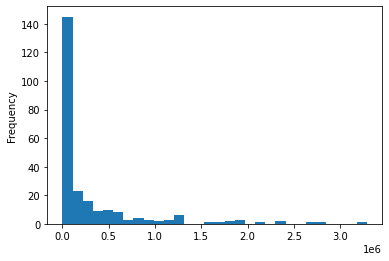

In [ ]:
df_population[df_population['area'] < 0.5e7]['area'].plot(kind = 'hist', bins = 30)